<a href="https://colab.research.google.com/github/iam-pattan/Fuzzy_and_GANs/blob/main/SDV(CTGAN_TVAE).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

https://sdv.dev/

https://www.connectedpapers.com/main/e7f3478fd8aac6940a4bf4f5eb60ac38f6b0b85b/Modeling-Tabular-data-using-Conditional-GAN/graph

https://papers.nips.cc/paper/2019/file/254ed7d2de3b23ab10936522dd547b78-Paper.pdf

https://towardsdatascience.com/review-of-gans-for-tabular-data-a30a2199342

In [ ]:
!pip install sdv
!pip uninstall numpy
!pip install numpy

     |████████████████████████████████| 81kB 3.6MB/s 
     |████████████████████████████████| 102kB 5.0MB/s 
     |████████████████████████████████| 17.9MB 1.5MB/s 
     |████████████████████████████████| 9.5MB 20.5MB/s 
     |████████████████████████████████| 5.7MB 34.8MB/s 
     |████████████████████████████████| 1.1MB 28.8MB/s 
     |████████████████████████████████| 51kB 6.1MB/s 
     |████████████████████████████████| 22.3MB 2.4MB/s 
     |████████████████████████████████| 9.5MB 29.8MB/s 
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1
  Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2
  Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      

Uninstalling numpy-1.19.5:
  Would remove:
    /usr/bin/f2py
    /usr/local/bin/f2py
    /usr/local/bin/f2py3
    /usr/local/bin/f2py3.7
    /usr/local/lib/python3.7/dist-packages/numpy-1.19.5.dist-info/*
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libgfortran-2e0d59d6.so.5.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libopenblasp-r0-09e95953.3.13.so
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libquadmath-2d0c479f.so.0.0.0
    /usr/local/lib/python3.7/dist-packages/numpy.libs/libz-eb09ad1d.so.1.2.3
    /usr/local/lib/python3.7/dist-packages/numpy/*
Proceed (y/n)? y
  Successfully uninstalled numpy-1.19.5
     |████████████████████████████████| 15.3MB 198kB/s 
ERROR: tensorflow 2.4.1 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have 

In [ ]:
!pip install table_evaluator

  Created wheel for table-evaluator: filename=table_evaluator-1.2.2.post1-cp37-none-any.whl size=17055 sha256=c485ae36f1c6c450b8adbcd94e0484de782d6d57051098cc439e37d959719b72
  Stored in directory: /root/.cache/pip/wheels/a9/4d/9d/62b61486fc85b53ef9bf7979a52cda067a514c2a7a05c49bd4
Successfully built table-evaluator


In [ ]:
# !pip install imbalanced-learn

In [ ]:
!wget 'https://myfirstlearningbucket.s3.ap-south-1.amazonaws.com/GAN_data.csv'

--2021-05-20 19:39:55--  https://myfirstlearningbucket.s3.ap-south-1.amazonaws.com/GAN_data.csv
Resolving myfirstlearningbucket.s3.ap-south-1.amazonaws.com (myfirstlearningbucket.s3.ap-south-1.amazonaws.com)... 52.219.160.26
Connecting to myfirstlearningbucket.s3.ap-south-1.amazonaws.com (myfirstlearningbucket.s3.ap-south-1.amazonaws.com)|52.219.160.26|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1013 [text/csv]
Saving to: ‘GAN_data.csv’

GAN_data.csv        100%[===================>]    1013  --.-KB/s    in 0s      

2021-05-20 19:39:55 (54.3 MB/s) - ‘GAN_data.csv’ saved [1013/1013]



## SMOTE

In [ ]:
import pandas as pd
load_data = pd.read_csv('/content/GAN_data.csv')
# data = load_data.drop(['Unnamed: 0','M1', 'M2', 'M3'], axis=1)
data = load_data.drop(['Unnamed: 0', 'M1', 'M3'], axis=1)
data.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,M2,W1,W2,W3
0,100,40,100,36.0,40,20,0,1,50,50,0
1,300,40,120,53.0,20,11,0,1,50,50,0
2,300,20,100,25.0,20,14,0,1,70,30,0
3,600,30,100,58.0,0,5,0,1,60,40,0
4,800,20,98,42.0,0,4,0,1,20,80,0


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scale = MinMaxScaler()
scaled_data = pd.DataFrame(scale.fit_transform(data))

In [ ]:
import numpy as np
X=np.array(scaled_data.drop(scaled_data.columns[7], axis=1))

y=np.array(scaled_data.iloc[:, 7])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f0693ee2ed0>,
      dtype=object)

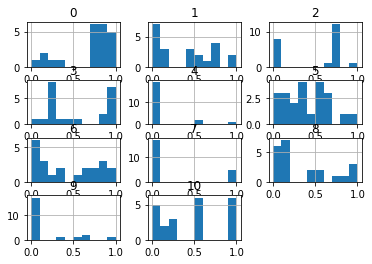

In [ ]:
scaled_data.hist()

In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
clf = KNeighborsClassifier()
clf.fit(x_train, y_train)
y_pred=clf.predict(x_test)
pd.crosstab(y_pred, y_test)

col_0,0.0,1.0
row_0,,
0.0,5,0
1.0,0,1


In [ ]:
# transform the dataset
#SMOTENC
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE # doctest: +NORMALIZE_WHITESPACE
# X, y = make_classification(n_classes=2, class_sep=2, weights=[0.1, 0.9], n_informative=3, n_redundant=1, flip_y=0, n_features=20, n_clusters_per_class=1, n_samples=100, random_state=10)
print('Original dataset shape %s' % Counter(y_test))

oversample = SMOTE(k_neighbors=5)
X, y = oversample.fit_resample(x_train, y_train)

ImportError: ignored

In [ ]:
# summarize the new class distribution
from collections import Counter

counter = Counter(y)
print(counter)

## CTGAN

In [ ]:
# ## Used for unique strings in the table
# from sdv.constraints import UniqueCombinations

# unique_comb = UniqueCombinations(
#      columns=['W1', 'W2', 'W3'],
#      handling_strategy='reject_sampling'
# )

In [ ]:
import pandas as pd
load_data = pd.read_csv('/content/GAN_data.csv')
data = load_data.drop(['Unnamed: 0','M1', 'M2', 'M3'], axis=1)
data.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
0,100,40,100,36.0,40,20,0,50,50,0
1,300,40,120,53.0,20,11,0,50,50,0
2,300,20,100,25.0,20,14,0,70,30,0
3,600,30,100,58.0,0,5,0,60,40,0
4,800,20,98,42.0,0,4,0,20,80,0


In [ ]:
data['Dummy1'] = 0
data['Dummy2'] = 100
data

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3,Dummy1,Dummy2
0,100,40,100,36.00,40,20,0,50,50,0,0,100
1,300,40,120,53.00,20,11,0,50,50,0,0,100
2,300,20,100,25.00,20,14,0,70,30,0,0,100
3,600,30,100,58.00,0,5,0,60,40,0,0,100
4,800,20,98,42.00,0,4,0,20,80,0,0,100
5,1600,32,100,84.40,0,17,21,80,0,20,0,100
6,1600,19,50,42.00,0,13,32,40,0,10,0,100
7,1800,31,100,87.30,0,14,49,80,0,20,0,100
8,1800,20,50,39.20,0,10,57,40,0,10,0,100
9,2000,34,100,82.50,0,12,6,80,0,20,0,100


In [ ]:
from sdv.constraints import GreaterThan

greater_const = GreaterThan(
     low='Final Weight',
     high='Initial Weight',
     strict = True,
     handling_strategy='reject_sampling'
)

In [ ]:
w1_const = GreaterThan(
     low='Dummy1',
     high='W1',
     strict = True,
     handling_strategy='reject_sampling'
)

w2_const = GreaterThan(
     low='Dummy1',
     high='W2',
     strict = True,
     handling_strategy='reject_sampling'
)

w3_const = GreaterThan(
     low='Dummy1',
     high='W3',
     strict = True,
     handling_strategy='reject_sampling'
)

water_const = GreaterThan(
     low='Dummy1',
     high='Water added',
     strict = False,
     handling_strategy='reject_sampling'
)

sec_const = GreaterThan(
     low='Dummy1',
     high='sec',
     handling_strategy='reject_sampling'
)

In [ ]:
from sdv.constraints import GreaterThan

temp_const = GreaterThan(
     low='Dummy2',
     high='Temperature',
     strict = True,
     handling_strategy='reject_sampling'
)

In [ ]:
def weight_formula(data):
  return data['W1']+data['W2']+data['W3']

In [ ]:
from sdv.constraints import ColumnFormula

weight_const = ColumnFormula(
     column='Initial Weight',
     formula=weight_formula,
     handling_strategy='reject_sampling'
     )

In [ ]:
const = [
         greater_const,
         w1_const,
         w2_const,
         w3_const,
         water_const,
         temp_const,
        #  sec_const,
         weight_const
               ]

In [ ]:
from sdv.tabular import CTGAN

model = CTGAN(constraints=const)
model.fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "wil

In [ ]:
new_data = model.sample(200)
real_data = data.drop(['Dummy1', 'Dummy2'], axis=1)
new_data = new_data.drop(['Dummy1', 'Dummy2'], axis=1)
new_data

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
595,1299,30,103,48.186861,0,13,25,77,1,25
103,1970,26,91,73.316215,1,4,12,13,3,75
499,1588,40,80,49.259235,0,9,23,9,37,34
579,1420,12,87,56.218952,31,6,34,33,2,52
1133,1641,29,103,58.109295,27,4,-1,25,21,57
...,...,...,...,...,...,...,...,...,...,...
977,1458,19,112,62.857739,27,17,15,48,39,25
1623,1528,25,55,32.029000,0,5,22,45,7,3
1662,1711,31,74,32.381413,7,10,1,7,14,53
1869,1006,33,97,50.514650,1,5,11,13,45,39


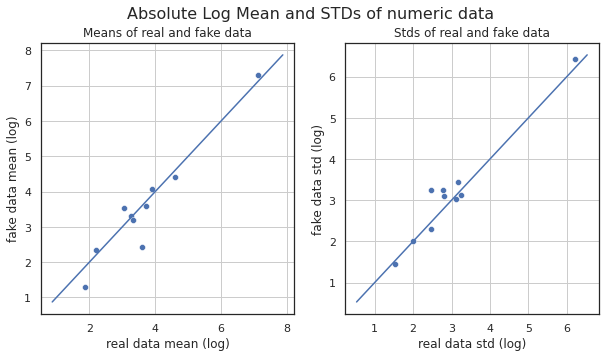

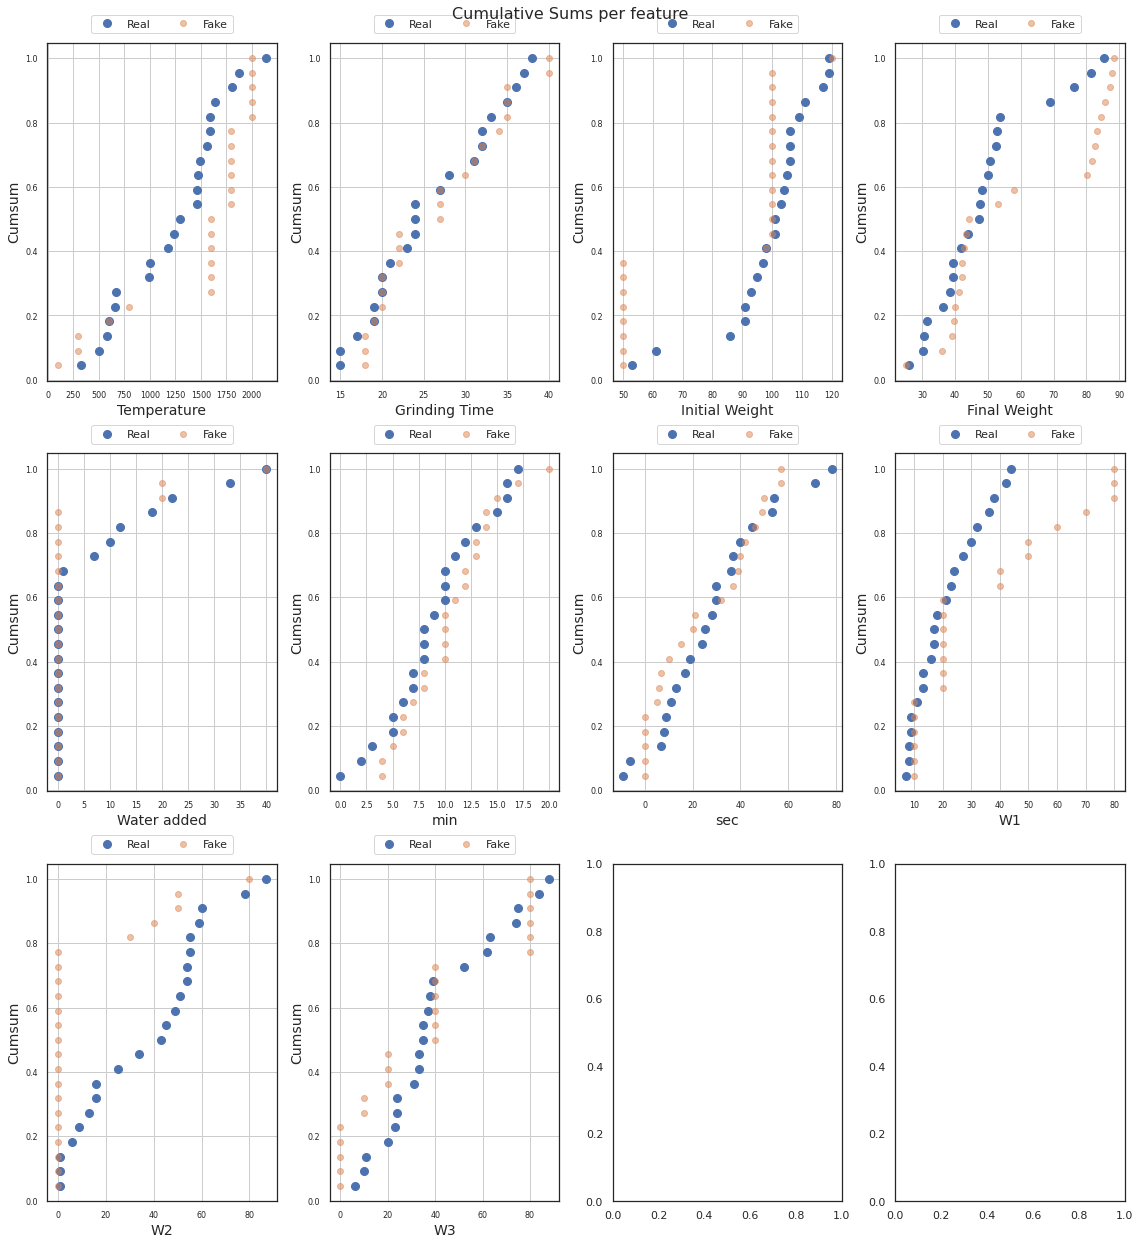

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

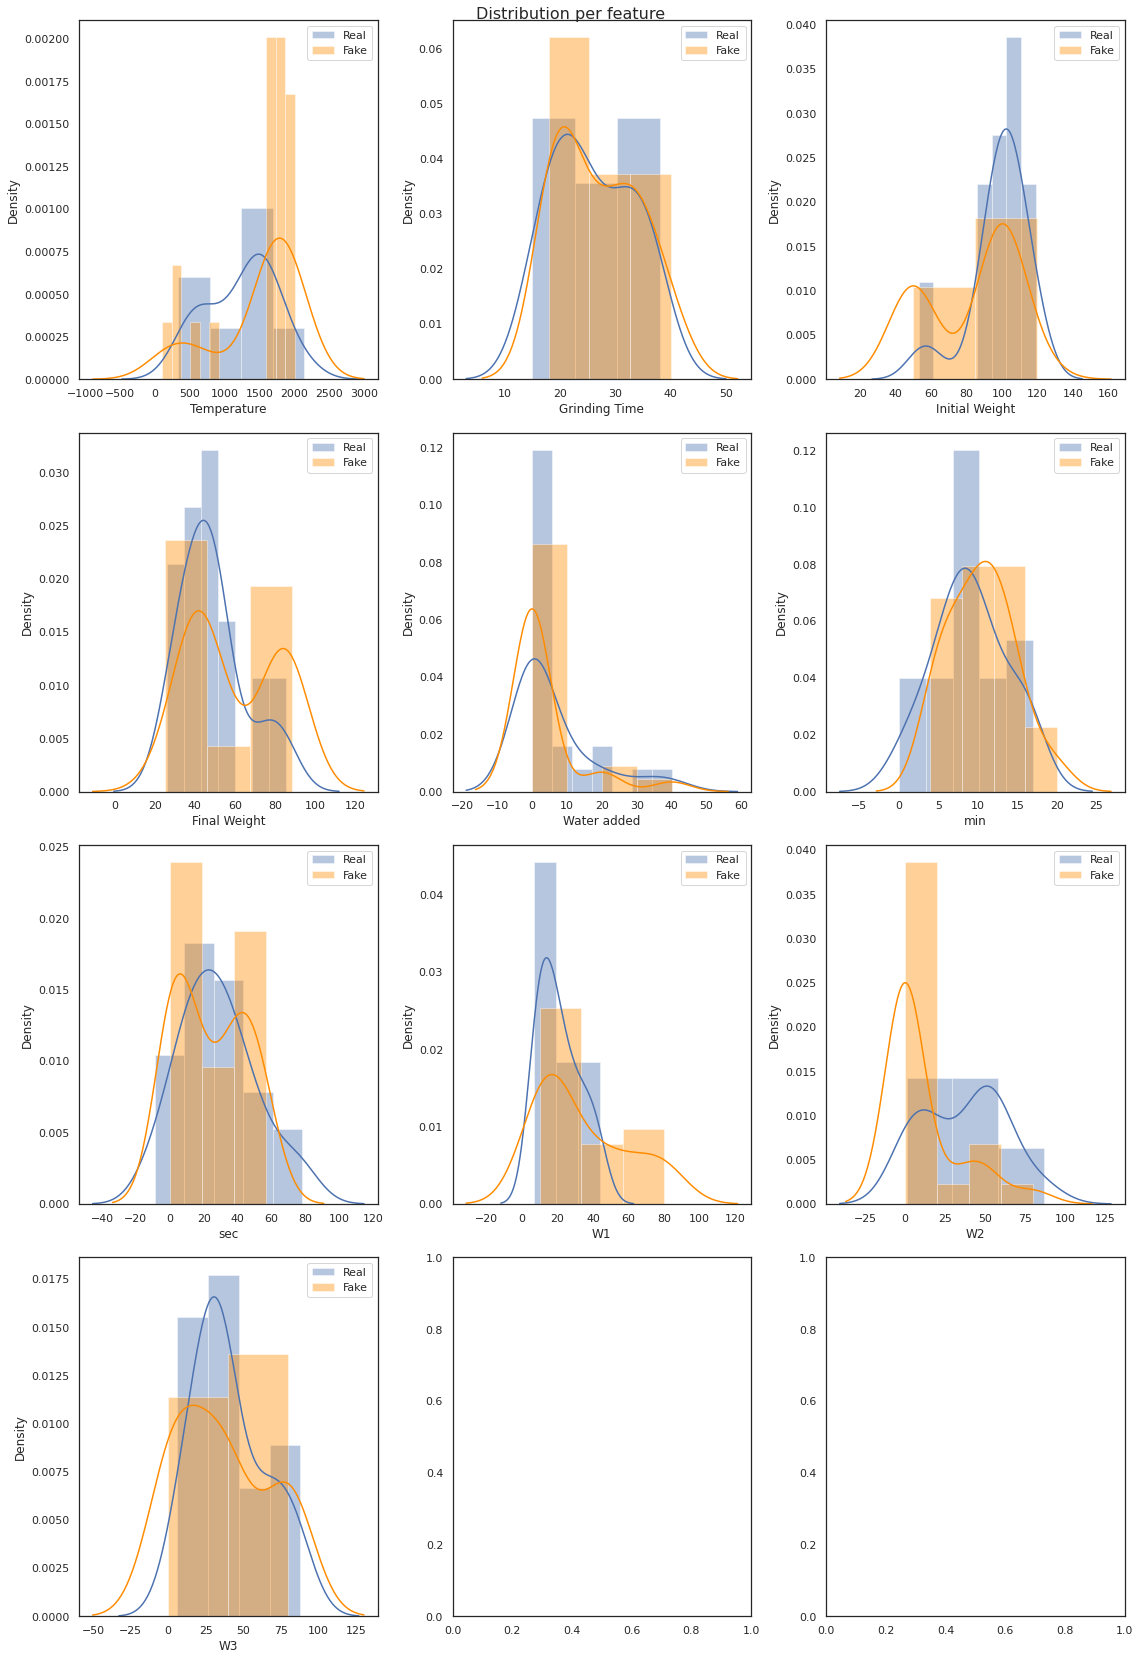

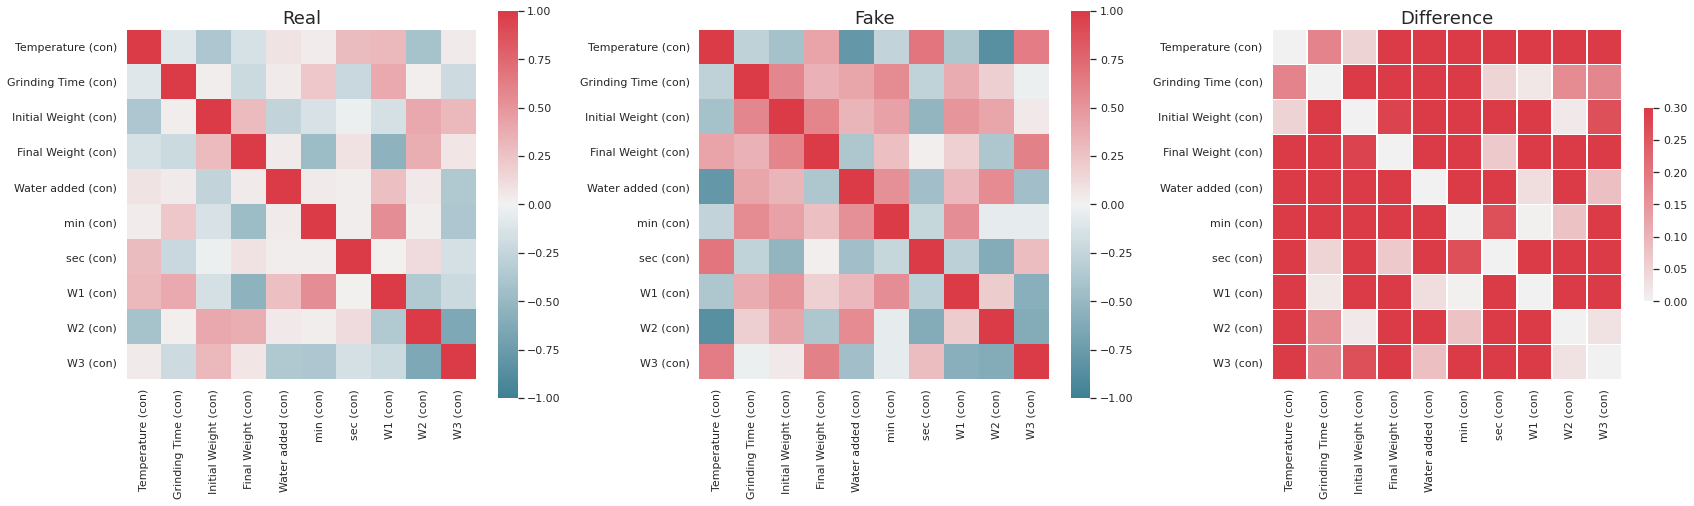

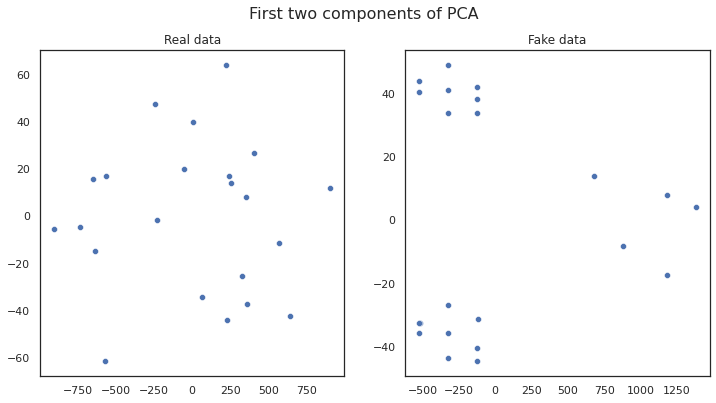

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(new_data, real_data)
table_evaluator.visual_evaluation()

In [ ]:
df = pd.DataFrame(new_data)

df.to_excel('/content/genenrated_GAN.xlsx')

In [ ]:
lis_metrics = ['DiscreteKLDivergence', 'LogisticDetection', 'SVCDetection', 'CSTest', 'KSTest', 'KSTestExtended', 'ContinuousKLDivergence']

In [ ]:
from sdv.evaluation import evaluate

new_data = model.sample(len(real_data))
evaluate(new_data, data, metrics=lis_metrics, aggregate=False)

/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_column_pairs.py:73: RuntimeWarning: Mean of empty slice
  return np.nanmean(values)
/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

,metric,name,raw_score,normalized_score,min_value,max_value,goal
1,LogisticDetection,LogisticRegression Detection,0.678571,0.678571,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,0.130952,0.130952,0.0,1.0,MAXIMIZE
4,KSTest,Inverted Kolmogorov-Smirnov D statistic,0.670455,0.670455,0.0,1.0,MAXIMIZE
5,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,0.670455,0.670455,0.0,1.0,MAXIMIZE
6,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,0.169219,0.169219,0.0,1.0,MAXIMIZE


In [ ]:
evaluate(new_data, data, metrics=lis_metrics)

/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_column_pairs.py:73: RuntimeWarning: Mean of empty slice
  return np.nanmean(values)
/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#return

0.45202569016031163

In [ ]:
x = evaluate(new_data, data)
x

/usr/local/lib/python3.7/dist-packages/sdmetrics/base.py:97: RuntimeWarning: overflow encountered in exp
  score = 1 / (1 + np.exp(-raw_score))
/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

0.43069103474793885

`### 
METHOD 2 ###`

In [ ]:
 ## METHOD 2 ##

In [ ]:
model1 = CTGAN(
constraints=const,
epochs=500,
batch_size=100,
generator_dim=(256, 256, 256),
discriminator_dim=(256, 256, 256))

In [ ]:
model1.fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "wil

In [ ]:
new_data = model1.sample(200)
new_data = new_data.drop(['Dummy1', 'Dummy2'], axis=1)
new_data.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
595,1898,25,102,75.639471,4,6,-29,23,41,38
1419,759,31,93,55.903099,0,1,40,16,9,68
1466,1876,33,84,25.625150,59,9,4,6,7,71
1944,1167,26,101,62.616991,63,4,-4,23,17,61
382,2220,19,133,30.163375,0,9,-1,34,16,83


In [ ]:
new_data = model1.sample(len(data))
evaluate(new_data, data, aggregate=False)

/usr/local/lib/python3.7/dist-packages/sdmetrics/base.py:97: RuntimeWarning: overflow encountered in exp
  score = 1 / (1 + np.exp(-raw_score))
/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,metric,name,raw_score,normalized_score,min_value,max_value,goal
1,LogisticDetection,LogisticRegression Detection,1.904762e-01,0.190476,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,5.442177e-02,0.054422,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-2.107909e+10,0.000000,-inf,inf,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,5.416667e-01,0.541667,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,5.416667e-01,0.541667,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,1.480169e-01,0.148017,0.0,1.0,MAXIMIZE


In [ ]:
evaluate(new_data, data)

/usr/local/lib/python3.7/dist-packages/sdmetrics/base.py:97: RuntimeWarning: overflow encountered in exp
  score = 1 / (1 + np.exp(-raw_score))
/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

0.26503229806979367

In [ ]:
df = pd.DataFrame(new_data)

df.to_excel('/content/genenrated_GAN_mod1.xlsx')

## TVAE

In [ ]:
from sdv.tabular import TVAE

model2 = TVAE(constraints=const)
model2.fit(data)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/mixture/_base.py:148: ConvergenceWarning: Number of distinct clusters (7) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  random_state=random_state).fit(X).labels_
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "will result in an error", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:72: FutureWarning: Pass n_components=10 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  "wil

In [ ]:
new_data = model2.sample(200)
real_data = data.drop(['Dummy1', 'Dummy2'], axis=1)
new_data = new_data.drop(['Dummy1', 'Dummy2'], axis=1)
new_data.head()

,Temperature,Grinding Time,Initial Weight,Final Weight,Water added,min,sec,W1,W2,W3
65,1152,28,106,49.704659,20,14,1,50,41,15
260,1616,26,98,41.148479,0,7,0,76,1,21
861,1994,28,94,82.092191,0,12,43,27,3,64
966,1899,22,103,80.754546,0,12,36,46,1,56
1610,1854,33,105,91.313273,0,14,8,56,5,44


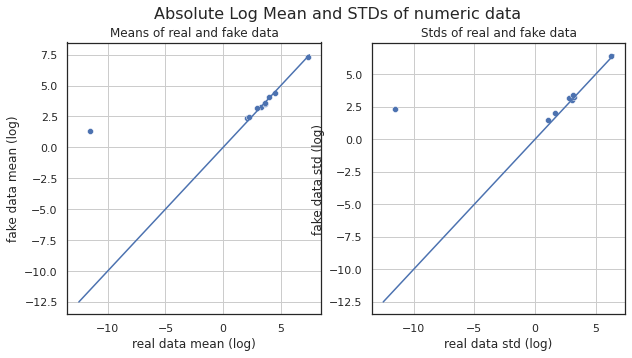

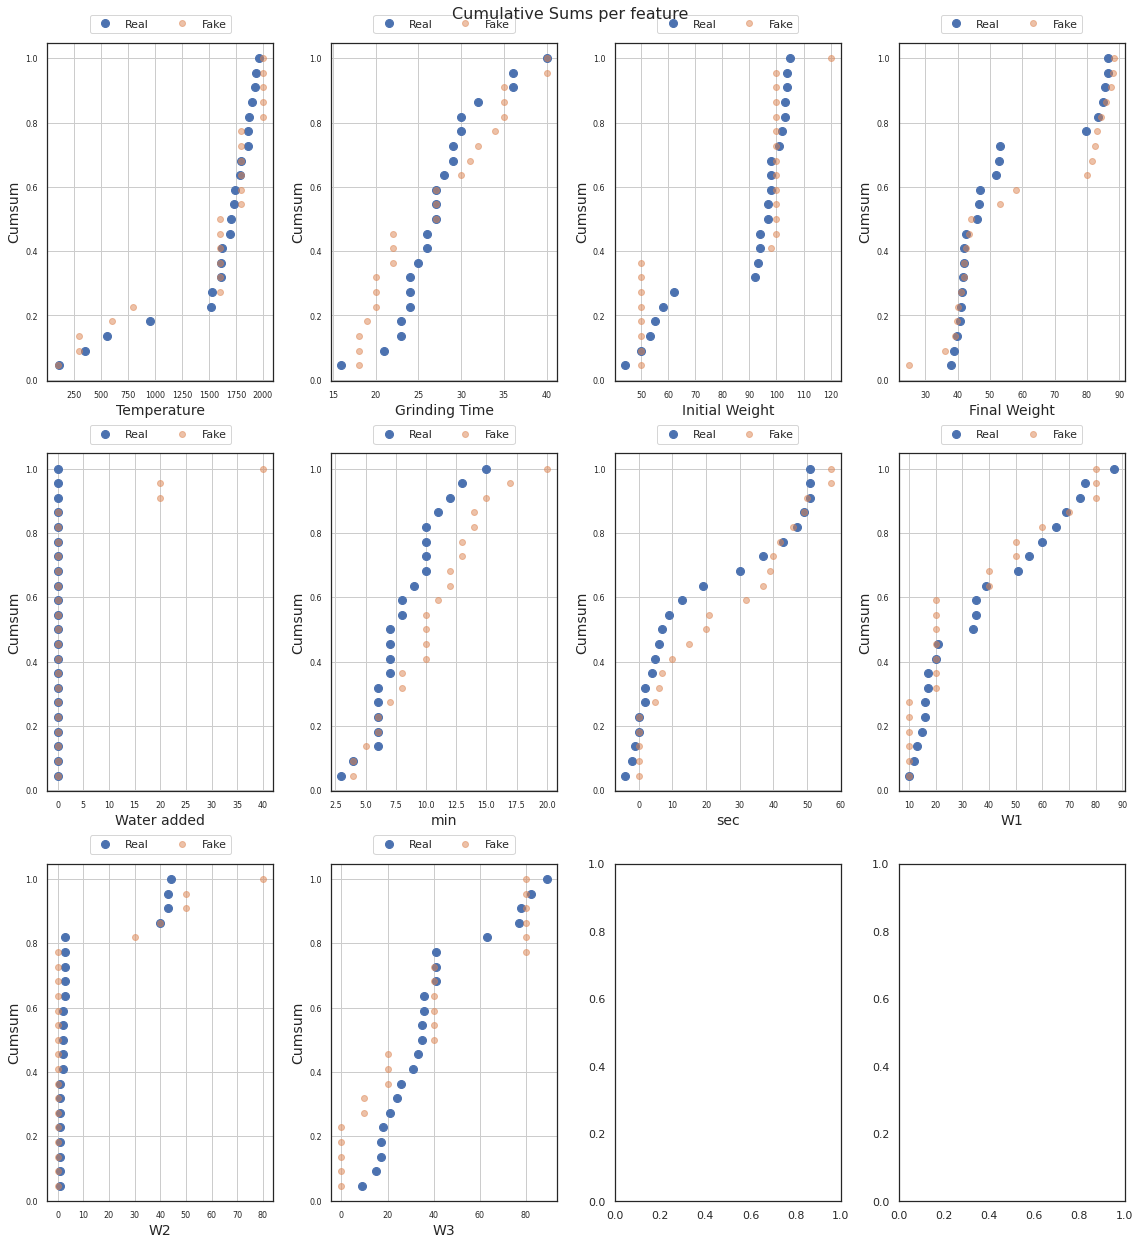

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

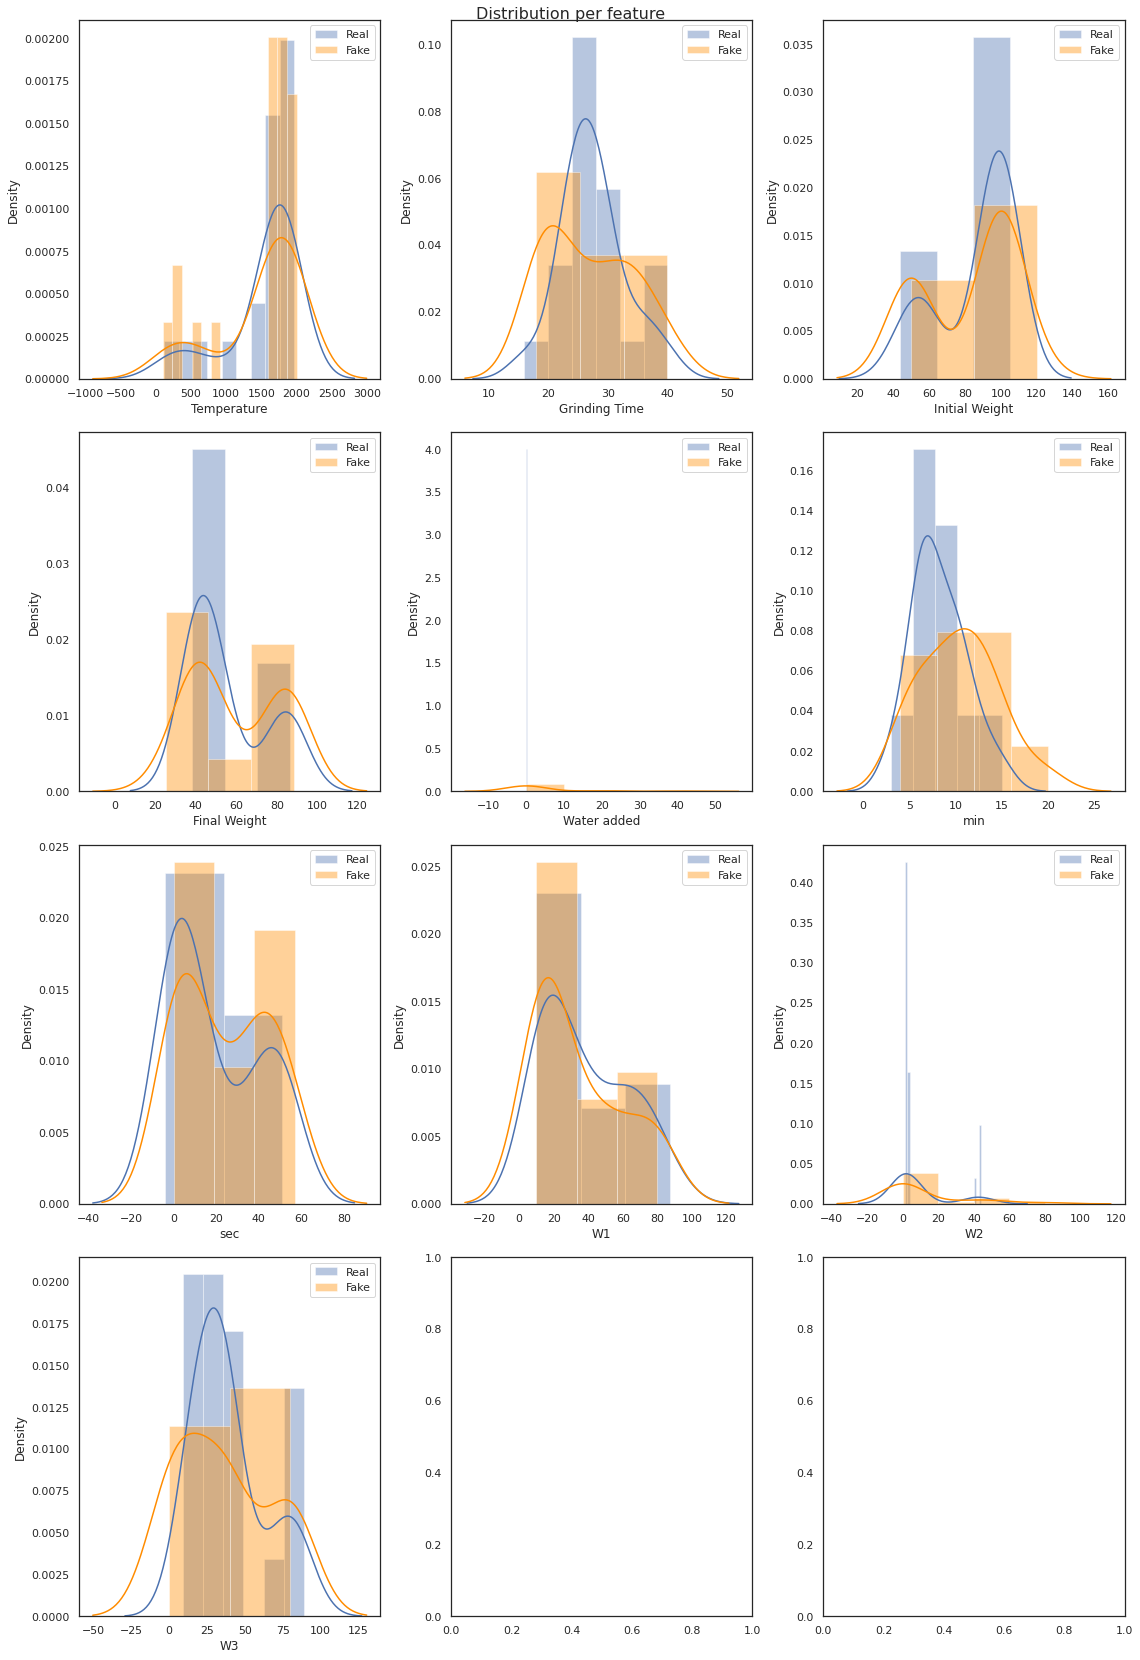

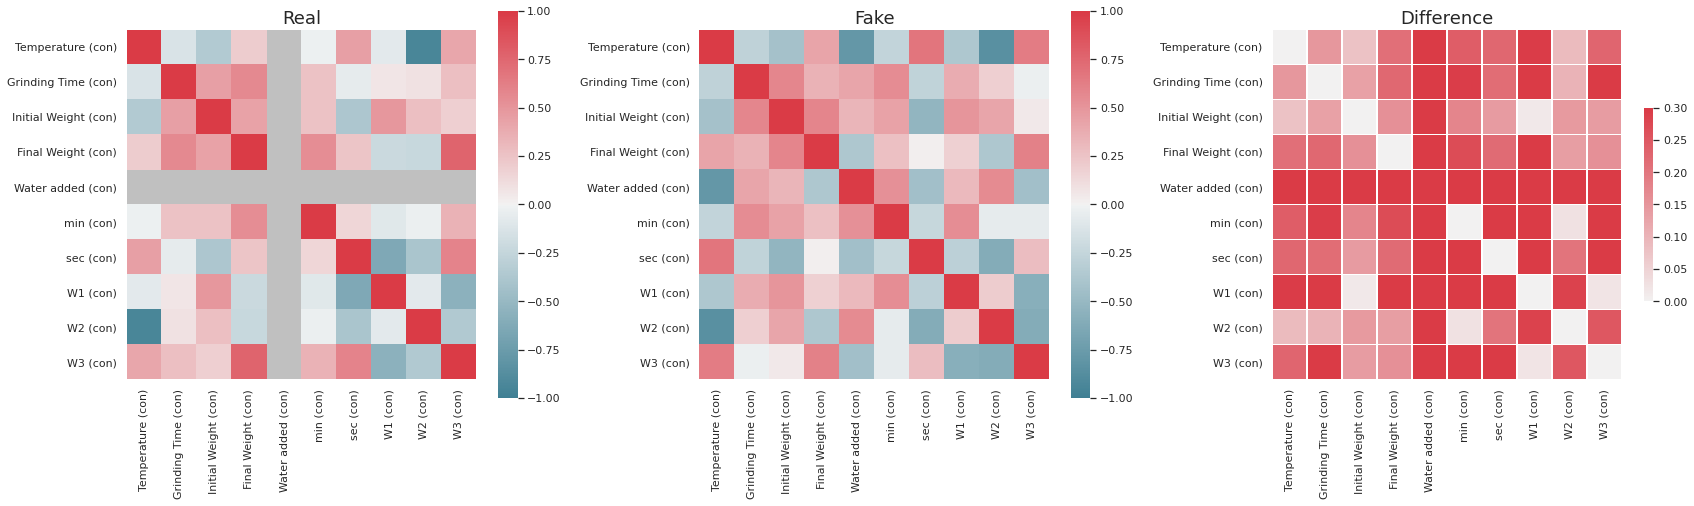

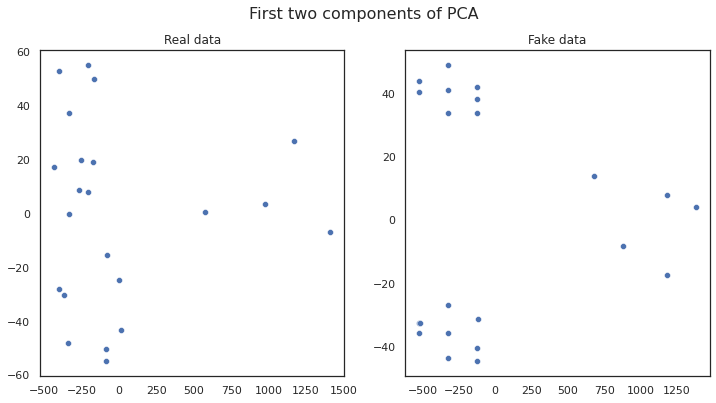

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(new_data, real_data)
table_evaluator.visual_evaluation()

In [ ]:
new_data = model2.sample(len(data))
evaluate(new_data, data, aggregate=False)

/usr/local/lib/python3.7/dist-packages/sdmetrics/base.py:97: RuntimeWarning: overflow encountered in exp
  score = 1 / (1 + np.exp(-raw_score))
/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

,metric,name,raw_score,normalized_score,min_value,max_value,goal
1,LogisticDetection,LogisticRegression Detection,6.020408e-01,0.602041,0.0,1.0,MAXIMIZE
2,SVCDetection,SVC Detection,8.571429e-01,0.857143,0.0,1.0,MAXIMIZE
11,GMLogLikelihood,GaussianMixture Log Likelihood,-2.309190e+09,0.000000,-inf,inf,MAXIMIZE
13,KSTest,Inverted Kolmogorov-Smirnov D statistic,7.348485e-01,0.734848,0.0,1.0,MAXIMIZE
14,KSTestExtended,Inverted Kolmogorov-Smirnov D statistic,7.348485e-01,0.734848,0.0,1.0,MAXIMIZE
27,ContinuousKLDivergence,Continuous Kullback–Leibler Divergence,3.228665e-01,0.322866,0.0,1.0,MAXIMIZE


In [ ]:
evaluate(new_data, data)

/usr/local/lib/python3.7/dist-packages/sdmetrics/base.py:97: RuntimeWarning: overflow encountered in exp
  score = 1 / (1 + np.exp(-raw_score))
/usr/local/lib/python3.7/dist-packages/sdmetrics/single_table/multi_single_column.py:84: RuntimeWarning: Mean of empty slice
  return np.nanmean(scores)
/usr/local/lib/python3.7/dist-packages/sdmetrics/column_pairs/statistical/kl_divergence.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  real_data[pd.isnull(real_data)] = 0.0
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:3093: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-vi

0.5420332766993247

In [ ]:
df = pd.DataFrame(new_data)
df.to_excel('/content/genenrated_VAE2.xlsx')

## GaussianCopulaGAN

In [ ]:
from sdv.tabular import CopulaGAN

model3 = CopulaGAN(constraints=const)
model3.fit(data)

In [ ]:
new_data = model3.sample(200)

In [ ]:
new_data = new_data.drop(['Dummy1', 'Dummy2'], axis=1)
real_data = data.drop(['Dummy1', 'Dummy2'], axis=1)
new_data.head()

In [ ]:
from table_evaluator import load_data, TableEvaluator
table_evaluator = TableEvaluator(new_data, real_data)
table_evaluator.visual_evaluation()

In [ ]:
new_data = model.sample(len(data))
evaluate(new_data, data, aggregate=False)

In [ ]:
evaluate(new_data, data)

In [ ]:
df = pd.DataFrame(new_data)
df.to_excel('/content/genenrated_CopulaGAN(35%).xlsx')